# keras classifier

In [1]:
# 相关的包

# models.Sequential，用来一层一层一层的去建立神经层；
# layers.Dense 意思是这个神经层是全连接层。
# layers.Activation 激励函数。
# optimizers.RMSprop 优化器采用 RMSprop，加速神经网络训练方法

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


## download the mnist to the path '~/.keras/datasets/' 


In [2]:
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(type(y_train))

<class 'numpy.ndarray'>


## data pre-processing

In [3]:
# normalize 归一化
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# one-hot 编码
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print(X_train[1].shape)
print(y_train[0])

(784,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Another way to build your neural net

In [15]:
# 直接在Sequential中的list建立神经层
model = Sequential([
        Dense(units=32, input_dim=784),
        Activation('relu'),
        Dense(units=10),  # 不用定义input_dim，因为在上一个层已经知道
        Activation('softmax')
    ])
model

## 查看模型

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Anoter way to define your optimizer

In [5]:
from keras.optimizers import RMSprop

rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(
    optimizer=rmsprop,
#     optimizer='RMSprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# from keras.optimizers import SGD

# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# model.compile(
#     loss='categorical_crossentropy',
#     optimizer=sgd,
#     metrics=['accuracy']
# )

## Another way to train the model

In [7]:
print('Training ------------')
model.fit(X_train, y_train, epochs=2, batch_size=32)

Training ------------
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 20s 340us/step - loss: 0.3441 - acc: 0.9047
Epoch 2/2
60000/60000 [==============================] - 22s 362us/step - loss: 0.1950 - acc: 0.9437


## Evaluate the model with the metrics we defined earlier

In [8]:
print('\nTesting ------------')
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)


Testing ------------
10000/10000 [==============================] - 1s 140us/step
test loss:  0.1740405245780945
test accuracy:  0.9511


### 优化算法对比
- SGD:0.93**
- RMSprop:0.95**

## keras model plot

In [13]:
from keras.utils import plot_model

plot_model(model, to_file='../pic/model.png', show_shapes=True, show_layer_names=True)

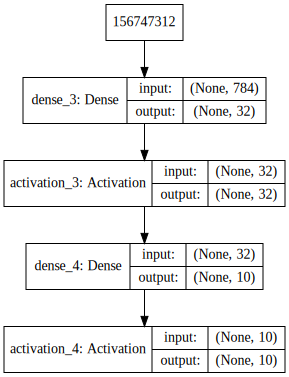

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))